## Import Libraries
<div id="0">
</div>

In [1]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

2024-04-17 15:11:22.841783: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 15:11:22.841912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 15:11:22.976652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print(device_lib.list_local_devices()) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7470102740966428754
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16274030592
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3496058459584100659
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


## Load Data
<div id="1">
</div>

In [3]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [4]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of N ...
Obtaining images of R ...
Obtaining images of space ...
Obtaining images of B ...
Obtaining images of I ...
Obtaining images of del ...
Obtaining images of F ...
Obtaining images of H ...
Obtaining images of E ...
Obtaining images of U ...
Obtaining images of M ...
Obtaining images of X ...
Obtaining images of K ...
Obtaining images of Q ...
Obtaining images of Y ...
Obtaining images of S ...
Obtaining images of G ...
Obtaining images of A ...
Obtaining images of O ...
Obtaining images of T ...
Obtaining images of V ...
Obtaining images of Z ...
Obtaining images of C ...
Obtaining images of P ...
Obtaining images of L ...
Obtaining images of W ...
Obtaining images of D ...
Obtaining images of nothing ...
Obtaining images of J ...


In [5]:
print(len(X), len(y))

87000 87000


## Data Visualisation
<div id="2">
</div>

In [6]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 640x480 with 0 Axes>

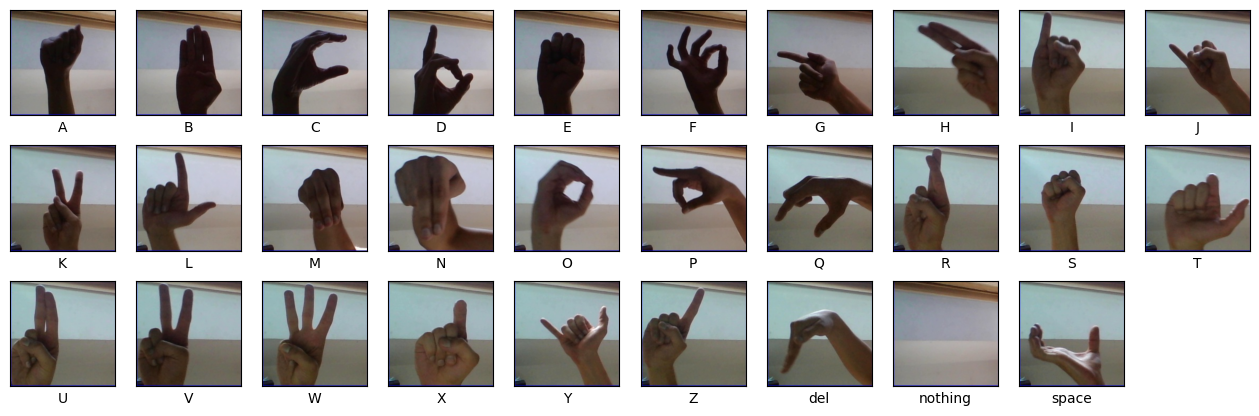

In [7]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

## Data Preprocessing
<div id="3">
</div>

In [8]:
def preprocess_data(X):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    return normalised_X
normalised_X = preprocess_data(X)

In [9]:
y_unique = set(y)
print(y_unique)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28}


In [10]:
label_encoded_y = utils.to_categorical(y)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)

In [12]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


## Define CNN Model
<div id="4">
</div>

In [13]:
classes = 29
batch = 32
epochs = 15
learning_rate = 0.001

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
adam = Adam(learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        29,725 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,597,661 (17.54 MB)

 Trainable params: 4,596,765 (17.54 MB)

 Non-trainable params: 896 (3.50 KB)

## Train Model
<div id="5">
</div>

In [17]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/15
  36/1958 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0920 - loss: 5.2565

I0000 00:00:1713367201.376185      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713367201.396573      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1958/1958 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6462 - loss: 1.3249

W0000 00:00:1713367218.071192      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1958/1958 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.6463 - loss: 1.3245 - val_accuracy: 0.7987 - val_loss: 0.8710
Epoch 2/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9524 - loss: 0.1476 - val_accuracy: 0.9257 - val_loss: 0.3300
Epoch 3/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9708 - loss: 0.1004 - val_accuracy: 0.8916 - val_loss: 0.5063
Epoch 4/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9793 - loss: 0.0742 - val_accuracy: 0.7991 - val_loss: 1.5429
Epoch 5/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9827 - loss: 0.0645 - val_accuracy: 0.9554 - val_loss: 0.1855
Epoch 6/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9880 - loss: 0.0485 - val_accuracy: 0.9779 - val_loss: 0.0950
Epoch 7/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0497 - val_accuracy: 0.8213 - val_loss: 1.5581
Epoch 8/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9889 - loss: 0.0451 - val_accura

## Evaluate Model
<div id="6">
</div>

In [18]:
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9135 - loss: 0.8873
Test accuracy: 0.9109195470809937
Test loss: 0.8786988258361816


W0000 00:00:1713367348.922112      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


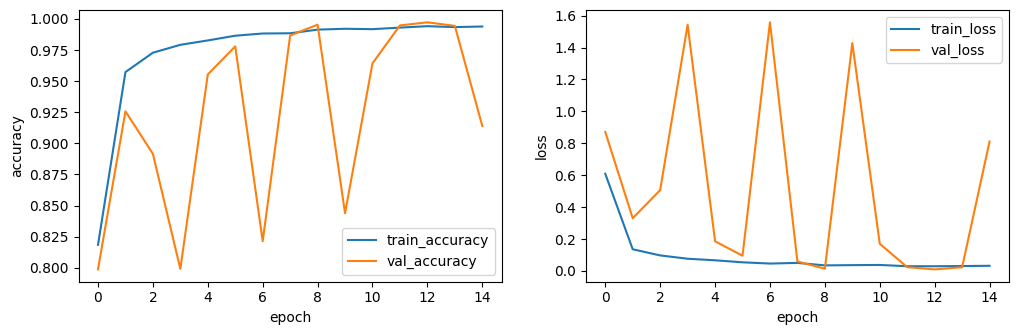

In [19]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


    
plot_results(model)

In [20]:
model.save('/kaggle/working/model.h5')

In [21]:
from keras.models import load_model
import PIL

loaded_model = load_model('/kaggle/working/model.h5')

In [22]:
  test_loss, test_acc = loaded_model.evaluate(x_test, y_test)

 78/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9177 - loss: 0.8690    

W0000 00:00:1713367350.647346      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.8873


W0000 00:00:1713367351.442257      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


'M'

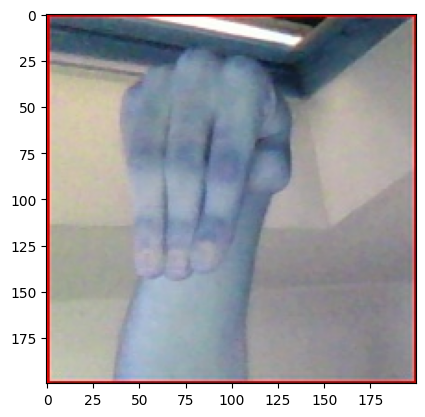

In [23]:
classes = os.listdir(train_dir)
img = cv2.imread('/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/M/M1003.jpg')
plt.imshow(img)
img = cv2.resize(img, (32, 32))
img = preprocess_data(img)
img = img.reshape((1, 32, 32, 3))
prediction = np.array(loaded_model.predict(img))
predicted = prediction.argmax()
prediction_probability = prediction[0, prediction.argmax()]
#print(prediction_probability)
#print(prediction)
#print(predicted)
classes[predicted]
